In [10]:
from regression_library import * # local library
### libraries called from regression_library:
# import matplotlib.pyplot as plt
# from matplotlib import pylab
# import math
# import numpy as np
# import pandas as pd
# from pandas.plotting import scatter_matrix
# import sklearn.linear_model
# from functools import reduce

## Demo function

input: [[ 551.88741967  462.01368341  449.21038418  424.38176762  476.2050646
   542.61014046]] 
response: [[ 134154.87011961]]


features:  [921.86449444454979, 646.51558038428789, 819.13543136588464, 748.62967515966466, 637.77388385981214, 965.25038935792008] 
response:  [ 238738.33649617] 
prediction:  [ 238923.78899644]
Scatterplot Matrix of Covariates


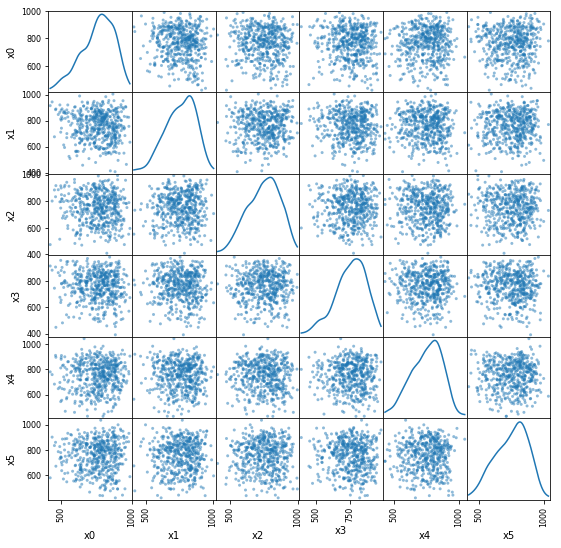

Selected Feature/Response Scatterplot Matrix


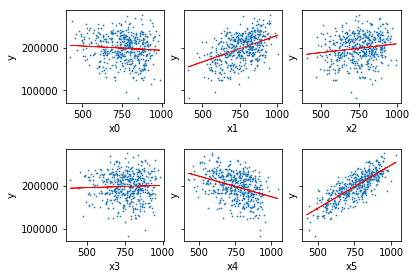

In [11]:
demo()

### Step by Step

In [12]:
# parameters
sample_size , number_of_features = (500, 6)
### params can be specified or left default
# mean = [-71,44,189,-2,61,0]
# sd = [40,10,17,20,40,5]

# generate multivariable data
train_data = generate_data(sample_size , number_of_features, dist_type='normal')

# intermediate step to ease generation of response 
# this process will be masked after I update the generate data and response methods
train_feature_dict = load_individual_features(train_data)

# coef can be left default or specified - gives the (so far) linear coefficients used to generate response
# more flexibility will be offered in next update (for polynomial response)
coef = (-20,125,42,11,-97, 203)
train_response = generate_response(train_data, train_feature_dict, coef=coef)

print('input:', train_data[0:1], '\n'+'response:', train_response[0:1], end='\n'*3)


input: [[ 457.25875217  526.83111629  449.24306186  455.85750718  494.61750592
   393.77786716]] 
response: [[ 112639.23501589]]




In [13]:
# train a linear model
lm = sklearn.linear_model.LinearRegression()
_ = lm.fit(train_data, train_response)

# generate test data - here I mix a normal and increasing distribution
test_data = generate_data(dist_type='normal') + .06*generate_data(dist_type='increasing')
test_feature_dict = load_individual_features(test_data)
test_response = generate_response(test_data, test_feature_dict, coef=coef)
predictions = lm.predict(test_data)

print('features: ', [test_feature_dict['feature'+str(i)][0] for i in range(number_of_features)],
  '\n'+'response: ', test_response[0], 
  '\n'+'prediction: ', predictions[0]) 



features:  [873.23340007865431, 585.12958065085195, 915.43045269044615, 813.67207247959527, 624.64540544943475, 953.64486600789587] 
response:  [ 236126.97588339] 
prediction:  [ 236168.08440949]


Scatterplot Matrix of Covariates


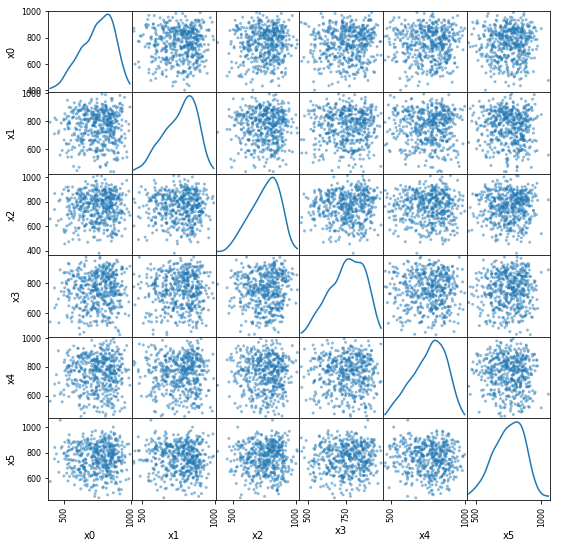

Selected Feature/Response Scatterplot Matrix


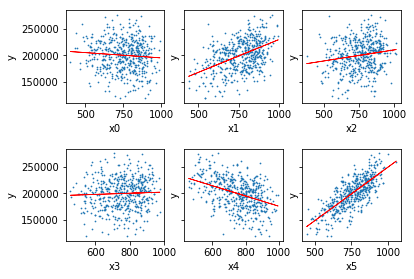

In [14]:
#plots
print('Scatterplot Matrix of Covariates')
features_scatterplot_matrix(test_data,diagonal='kde')
print('Selected Feature/Response Scatterplot Matrix')
response_scatterplot_matrix(test_data,response=test_response,feature_dict=test_feature_dict,
                        # select features
                        #desired_indices=(1,2),
                        # plot regression
                        dictionary_tuple=generate_predictions(test_data, lm))